Plots based on output csv file

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## 1. Read CSV file

read the data

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# 我们首先将数据转化为字典形式，方便转化为dataframe
data = {
    'Category': ['Arithmetic reasoning', 'Arithmetic reasoning', 'Arithmetic reasoning', 'Arithmetic reasoning', 'Arithmetic reasoning', 
                 'Symbolic reasoning', 'Symbolic reasoning', 'Symbolic reasoning', 'Symbolic reasoning', 'Symbolic reasoning',
                 'Commonsense', 'Commonsense', 'Commonsense', 'Commonsense', 'Commonsense',
                 'Professional', 'Professional', 'Professional', 'Ethics', 'Ethics', 'Ethics'],
    'Dataset': ['GSM8K', 'GSM8K', 'GSM8K', 'SVAMP', 'SVAMP', 
                'DateUnd', 'DateUnd', 'DateUnd', 'Object Counting', 'Object Counting',
                'StrategyQA', 'StrategyQA', 'StrategyQA', 'Sports Understanding', 'Sports Understanding',
                'Prf-Law', 'Prf-Law', 'Prf-Law', 'Biz-Ethics', 'Biz-Ethics', 'Biz-Ethics'],
    'Method': ['vanilla', 'vanilla-cot', 'Top-K', 'vanilla', 'vanilla-cot',
               'vanilla', 'vanilla-cot', 'Top-K', 'vanilla', 'vanilla-cot',
               'vanilla', 'vanilla-cot', 'Top-K', 'vanilla', 'vanilla-cot',
               'vanilla', 'vanilla-cot', 'Top-K', 'vanilla', 'vanilla-cot', 'Top-K'],
    'Acc': [28, 80, 22, 65, 81,
            18, 73, 33, 48, 56,
            58, 68, 61, 56, 73,
            46, 52, 42, 63, 61, 0],
    'ECE': [66, 10, 20, 35, 12,
            82, 23, 26, 52, 44,
            42, 22, 14, 42, 15,
            44, 37, 17, 32, 30, 0],
    'AUROC': [65, 55, 59, 52, 62,
              50, 57, 74, 50, 50,
              49, 60, 61, 55, 68,
              50, 49, 59, 56, 56, 0],
}

# 创建DataFrame
df = pd.DataFrame(data)

In [43]:
df

,Category,Dataset,Method,Acc,ECE,AUROC
0,Arithmetic reasoning,GSM8K,vanilla,28,66,65
1,Arithmetic reasoning,GSM8K,vanilla-cot,80,10,55
2,Arithmetic reasoning,GSM8K,Top-K,22,20,59
3,Arithmetic reasoning,SVAMP,vanilla,65,35,52
4,Arithmetic reasoning,SVAMP,vanilla-cot,81,12,62
5,Symbolic reasoning,DateUnd,vanilla,18,82,50
6,Symbolic reasoning,DateUnd,vanilla-cot,73,23,57
7,Symbolic reasoning,DateUnd,Top-K,33,26,74
8,Symbolic reasoning,Object Counting,vanilla,48,52,50
9,Symbolic reasoning,Object Counting,vanilla-cot,56,44,50


In [44]:
df.Dataset.unique()

array(['GSM8K', 'SVAMP', 'DateUnd', 'Object Counting', 'StrategyQA',
       'Sports Understanding', 'Prf-Law', 'Biz-Ethics'], dtype=object)

In [45]:
test_datasets = ['GSM8K', 'DateUnd',
        'StrategyQA', 'Biz-Ethics', 'Prf-Law']

choose the results of the dataset we want

In [46]:
df = df[df['Dataset'].isin(test_datasets)]


In [47]:
df

,Category,Dataset,Method,Acc,ECE,AUROC
0,Arithmetic reasoning,GSM8K,vanilla,28,66,65
1,Arithmetic reasoning,GSM8K,vanilla-cot,80,10,55
2,Arithmetic reasoning,GSM8K,Top-K,22,20,59
5,Symbolic reasoning,DateUnd,vanilla,18,82,50
6,Symbolic reasoning,DateUnd,vanilla-cot,73,23,57
7,Symbolic reasoning,DateUnd,Top-K,33,26,74
10,Commonsense,StrategyQA,vanilla,58,42,49
11,Commonsense,StrategyQA,vanilla-cot,68,22,60
12,Commonsense,StrategyQA,Top-K,61,14,61
15,Professional,Prf-Law,vanilla,46,44,50


## 02 Misleading Plots

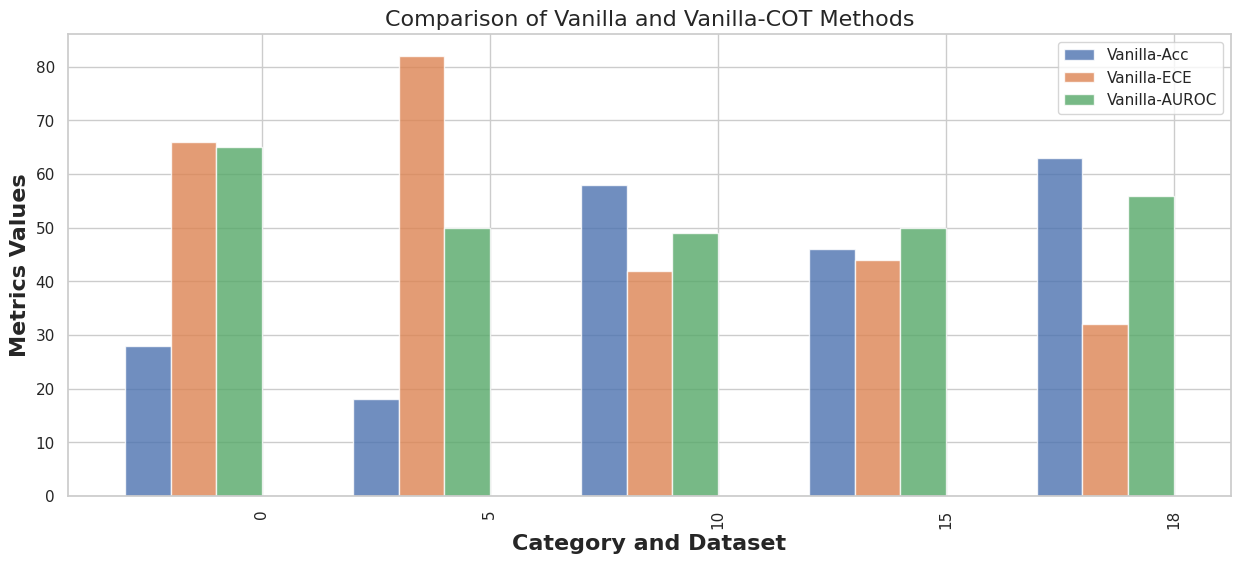

In [48]:
# 创建堆叠的柱状图
fig, ax = plt.subplots(figsize=(15, 6))
# df[df.Method=='vanilla-cot'].plot(kind='bar', ax=ax, position=1, color='red', width=0.6, alpha=0.8)
df[df.Method=='vanilla'].plot(kind='bar', ax=ax, position=1, width=0.6, alpha=0.8)

# 设置图的标题和坐标轴的标题
ax.set_title('Comparison of Vanilla and Vanilla-COT Methods', fontsize=16)
ax.set_xlabel('Category and Dataset', fontsize=16, fontweight='bold')
ax.set_ylabel('Metrics Values', fontsize=16, fontweight='bold')

# 显示图例并放在合适的位置
ax.legend(["Vanilla-Acc", "Vanilla-ECE", "Vanilla-AUROC", "Vanilla-COT-Acc", "Vanilla-COT-ECE", "Vanilla-COT-AUROC"])
plt.savefig('result_for_figure/vanilla_vs_cot_verbalized.pdf', dpi=500, bbox_inches='tight')

plt.show()

In [49]:
df

,Category,Dataset,Method,Acc,ECE,AUROC
0,Arithmetic reasoning,GSM8K,vanilla,28,66,65
1,Arithmetic reasoning,GSM8K,vanilla-cot,80,10,55
2,Arithmetic reasoning,GSM8K,Top-K,22,20,59
5,Symbolic reasoning,DateUnd,vanilla,18,82,50
6,Symbolic reasoning,DateUnd,vanilla-cot,73,23,57
7,Symbolic reasoning,DateUnd,Top-K,33,26,74
10,Commonsense,StrategyQA,vanilla,58,42,49
11,Commonsense,StrategyQA,vanilla-cot,68,22,60
12,Commonsense,StrategyQA,Top-K,61,14,61
15,Professional,Prf-Law,vanilla,46,44,50


In [50]:
df[df.Method=='vanilla']

,Category,Dataset,Method,Acc,ECE,AUROC
0,Arithmetic reasoning,GSM8K,vanilla,28,66,65
5,Symbolic reasoning,DateUnd,vanilla,18,82,50
10,Commonsense,StrategyQA,vanilla,58,42,49
15,Professional,Prf-Law,vanilla,46,44,50
18,Ethics,Biz-Ethics,vanilla,63,32,56


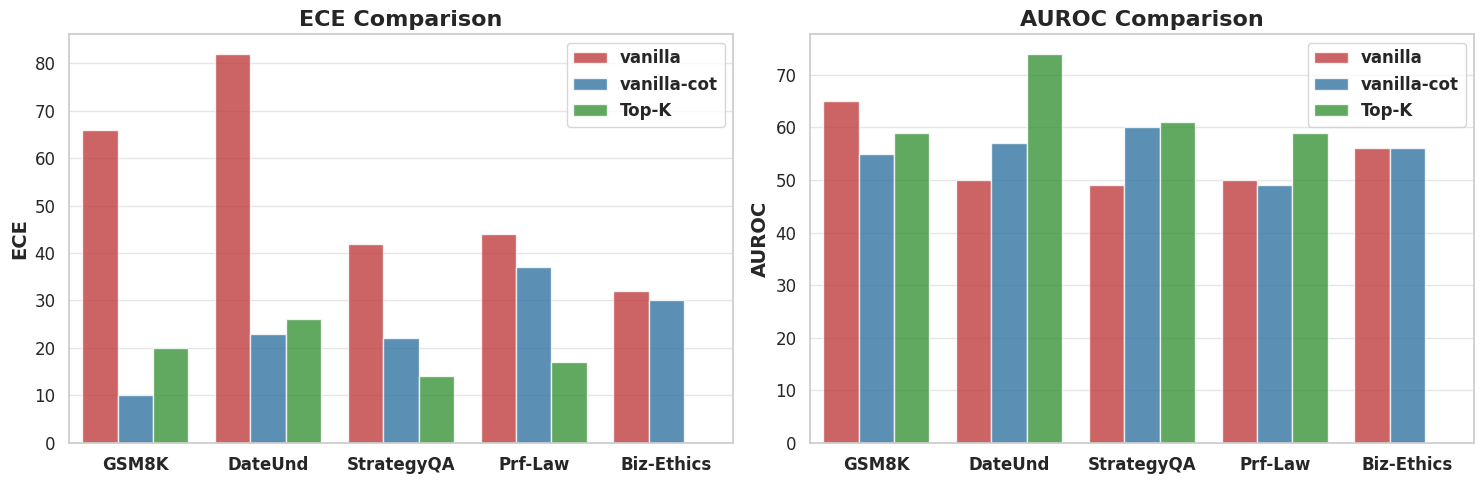

In [52]:
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

correct_color = plt.cm.tab10(0)
wrong_color = plt.cm.tab10(3)

sns.barplot(data=df, x='Dataset', y='ECE', hue='Method', ax=ax[0], palette = ['tab:red', 'tab:blue', 'tab:green'], alpha=0.8)
ax[0].set_title('ECE Comparison', fontsize=16, fontweight='bold')
ax[0].set_xlabel('', fontsize=14, fontweight='bold')
ax[0].set_ylabel('ECE', fontsize=14, fontweight='bold')
ax[0].legend(prop={'size': 12, 'weight': 'bold'})
ax[0].tick_params(axis='y', which='major', grid_alpha=0.5, labelsize=12)
for label in ax[0].get_xticklabels():
    label.set_fontsize(12)
    label.set_weight('bold')

sns.barplot(data=df, x='Dataset', y='AUROC', hue='Method', ax=ax[1], palette = ['tab:red', 'tab:blue', 'tab:green'], alpha=0.8)
ax[1].set_title('AUROC Comparison', fontsize=16, fontweight='bold')
ax[1].set_xlabel('', fontsize=14, fontweight='bold')
ax[1].set_ylabel('AUROC', fontsize=14, fontweight='bold')
ax[1].legend(prop={'size': 12, 'weight': 'bold'})
ax[1].tick_params(axis='y', which='major', grid_alpha=0.5, labelsize=12)
for label in ax[1].get_xticklabels():
    label.set_fontsize(12)
    label.set_weight('bold')

plt.tight_layout()
plt.savefig('result_for_figure/vanilla_vs_cot_vs_topk_ECE_AUROC_verbalized.pdf', dpi=500, bbox_inches='tight')    
plt.show()

skip this code

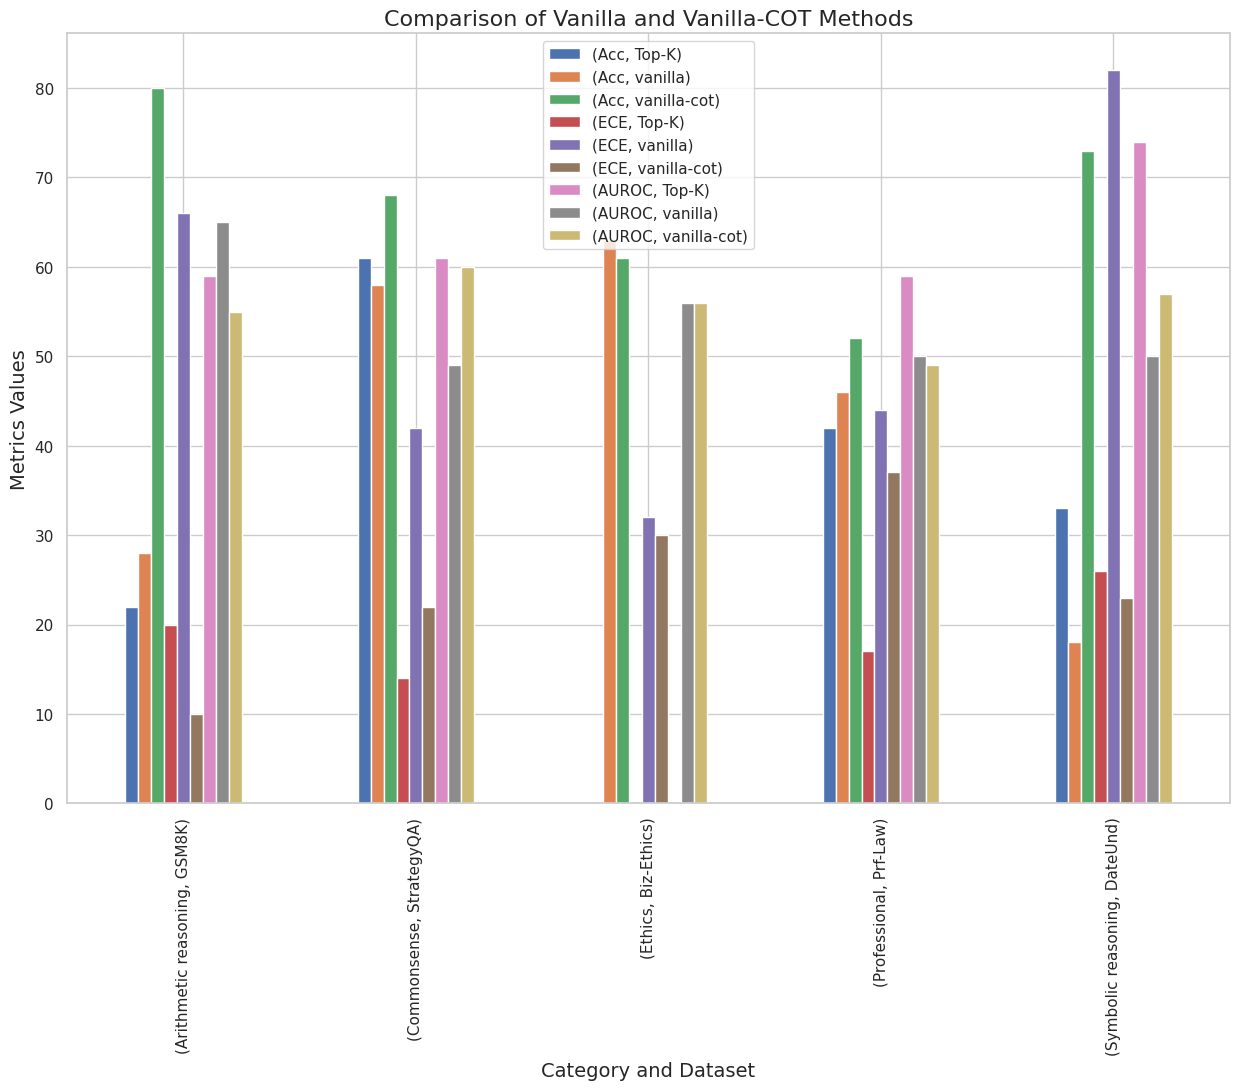

In [23]:


# 通过pivot函数将数据转化为适合画图的格式
df_pivot = df.pivot(index=['Category', 'Dataset'], columns='Method', values=['Acc', 'ECE', 'AUROC'])

# 创建一个新的figure，并设置其大小
fig, ax = plt.subplots(figsize=(15, 10))

# 通过DataFrame的plot方法画出bar图
df_pivot.plot(kind='bar', ax=ax)

# 设置图的标题和坐标轴的标题
ax.set_title('Comparison of Vanilla and Vanilla-COT Methods', fontsize=16)
ax.set_xlabel('Category and Dataset', fontsize=14)
ax.set_ylabel('Metrics Values', fontsize=14)

# 显示图例并放在合适的位置
ax.legend(loc='best')

# 显示图形
plt.show()

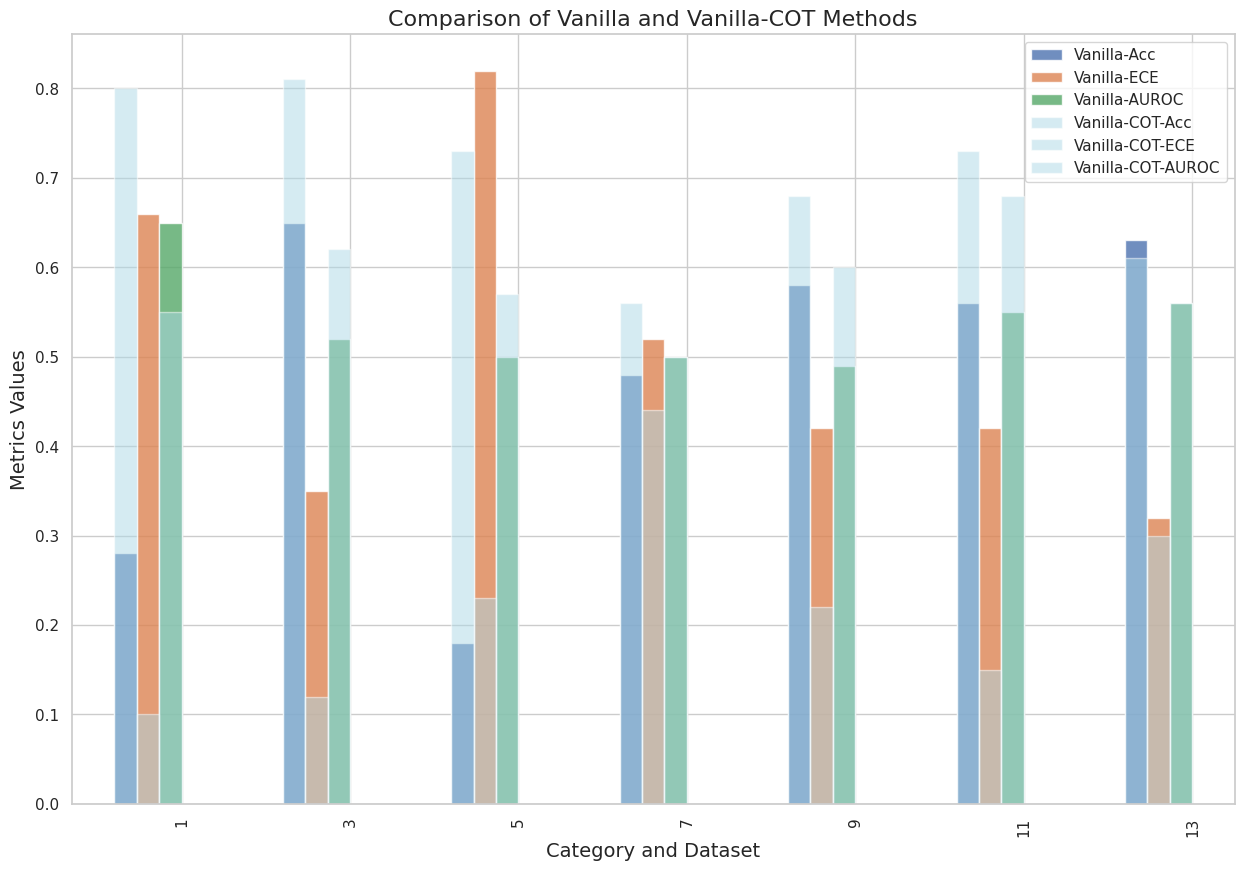

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# 创建DataFrame
data = {
    'Category': ['Arithmetic reasoning', 'Arithmetic reasoning', 'Arithmetic reasoning', 'Arithmetic reasoning', 
                 'Symbolic reasoning', 'Symbolic reasoning', 'Symbolic reasoning', 'Symbolic reasoning',
                 'Commonsense', 'Commonsense', 'Commonsense', 'Commonsense',
                 'Ethics', 'Ethics'],
    'Dataset': ['GSM8K', 'GSM8K', 'SVAMP', 'SVAMP', 
                'Date Understanding (BigBench)', 'Date Understanding (BigBench)', 'Object Counting (BigBench)', 'Object Counting (BigBench)',
                'StrategyQA', 'StrategyQA', 'Sports Understanding', 'Sports Understanding',
                'Business_Ethics', 'Business_Ethics'],
    'Method': ['vanilla', 'vanilla-cot', 'vanilla', 'vanilla-cot',
               'vanilla', 'vanilla-cot', 'vanilla', 'vanilla-cot',
               'vanilla', 'vanilla-cot', 'vanilla', 'vanilla-cot',
               'vanilla', 'vanilla-cot'],
    'Acc': [0.28, 0.80, 0.65, 0.81, 
            0.18, 0.73, 0.48, 0.56,
            0.58, 0.68, 0.56, 0.73,
            0.63, 0.61],
    'ECE': [0.66, 0.10, 0.35, 0.12,
            0.82, 0.23, 0.52, 0.44,
            0.42, 0.22, 0.42, 0.15,
            0.32, 0.30],
    'AUROC': [0.65, 0.55, 0.52, 0.62,
              0.50, 0.57, 0.50, 0.50,
              0.49, 0.60, 0.55, 0.68,
              0.56, 0.56],
}

df = pd.DataFrame(data)

# 创建堆叠的柱状图
fig, ax = plt.subplots(figsize=(15, 10))
df[df.Method=='vanilla'].plot(kind='bar', ax=ax, position=1, width=0.4, alpha=0.8)
df[df.Method=='vanilla-cot'].plot(kind='bar', ax=ax, position=1, color='lightblue', width=0.4, alpha=0.5)

# 设置图的标题和坐标轴的标题
ax.set_title('Comparison of Vanilla and Vanilla-COT Methods', fontsize=16)
ax.set_xlabel('Category and Dataset', fontsize=14)
ax.set_ylabel('Metrics Values', fontsize=14)

# 显示图例并放在合适的位置
ax.legend(["Vanilla-Acc", "Vanilla-ECE", "Vanilla-AUROC", "Vanilla-COT-Acc", "Vanilla-COT-ECE", "Vanilla-COT-AUROC"])
plt.savefig('result_for_figure/vanilla_vs_cot_verbalized.pdf', dpi=500, bbox_inches='tight')

plt.show()

In [29]:
# Define the labels for the x-axis
dataset_order = ['ObjectCounting', 'DateUnderstanding', 'GSM8K', 'ScienceQA']
labels = ['ObjCount', 'DateReason', 'GSM8K', 'ScienceQA']

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 1 with shape (15,).

<Figure size 1500x400 with 0 Axes>

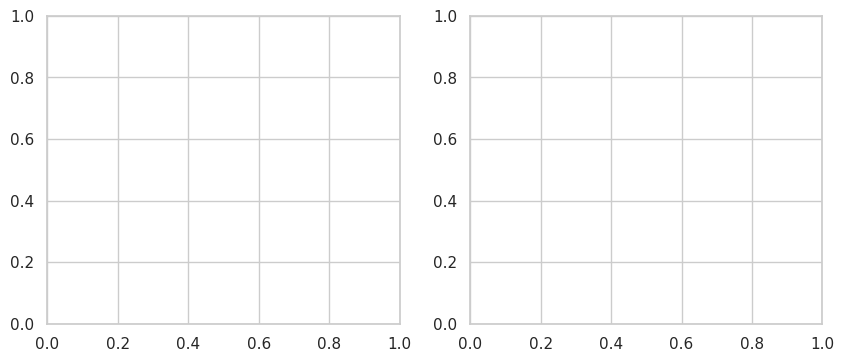

In [31]:
# Define the positions of the bars on the x-axis
x = np.arange(len(labels))

# Define the width of the bars
width = 0.35

# Create the subplots
plt.figure(figsize=(15, 4))
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Create the bar charts for ECE in each scenario
axs[0].bar(x - width/2, original_df['ECE'], width, label='Verbalized Conf')
axs[0].bar(x + width/2, misleading_df['ECE'], width, label='Consistency Conf')
axs[0].set_title('ECE')
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels)
axs[0].set_ylim([0.0, 1.0])
axs[0].legend()

# Create the bar charts for AUROC in each scenario
axs[1].bar(x - width/2, original_df['AUROC'], width, label='Verbalized Conf')
axs[1].bar(x + width/2, misleading_df['AUROC'], width, label='Consistency Conf')
axs[1].set_title('AUROC')
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels)
axs[1].legend()
axs[1].set_ylim([0.0, 1.0])

# Add the labels for the x-axis and the legend
fig.suptitle('Performance Comparison between verbalized confidence and consistency-driven confidence')
plt.savefig('misleading.png', dpi=600)
plt.show()

## 03 Multistep Plots

### 3.1 read data

original_df

multistep_df

In [21]:
import csv

# Read the CSV file
df = pd.read_csv('output/multistep/temp_results.csv')

multistep_df = df[df['type'] == 'Multi-step']
original_df = df[df['type'] == 'Origin']

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/zhiyuan/anaconda3/envs/fastchat/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_1984707/1181494192.py", line 4, in <module>
    df = pd.read_csv('output/multistep/temp_results.csv')
  File "/home/zhiyuan/anaconda3/envs/fastchat/lib/python3.8/site-packages/pandas/io/parsers/readers.py", line 912, in read_csv
    escapechar: str | None = None,
  File "/home/zhiyuan/anaconda3/envs/fastchat/lib/python3.8/site-packages/pandas/io/parsers/readers.py", line 577, in _read
    if kwds.get("parse_dates", None) is None:
  File "/home/zhiyuan/anaconda3/envs/fastchat/lib/python3.8/site-packages/pandas/io/parsers/readers.py", line 1407, in __init__
    self._engine_specified = kwds.get("engine_specified", engine_specified)
  File "/home/zhiyuan/anaconda3/envs/fastchat/lib/python3.8/site-packages/pandas/io/parsers/readers.py", line 1661, in

In [20]:
misleading_df['dataset'].keys

NameError: name 'misleading_df' is not defined

### 3.2 plot based on dataframe

<Figure size 1080x288 with 0 Axes>

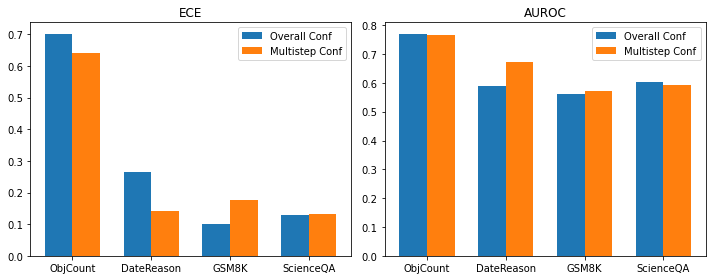

In [13]:
# Define the data for the without misleading and misleading scenarios

# Define the labels for the x-axis
labels = ['ObjCount', 'DateReason', 'GSM8K',  'ScienceQA']

# Define the positions of the bars on the x-axis
x = np.arange(len(labels))

# Define the width of the bars
width = 0.35

# Create the subplots
plt.figure(figsize=(15, 4))
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Create the bar charts for ECE in each scenario
axs[0].bar(x - width/2, original_df['ece'], width, label='Overall Conf')
axs[0].bar(x + width/2, multistep_df['ece'], width, label='Multistep Conf')
axs[0].set_title('ECE')
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels)
axs[0].legend()

# Create the bar charts for AUROC in each scenario
axs[1].bar(x - width/2, original_df['aucroc'], width, label='Overall Conf')
axs[1].bar(x + width/2, multistep_df['aucroc'], width, label='Multistep Conf')
axs[1].set_title('AUROC')
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels)
axs[1].legend()
plt.tight_layout()
# Add the labels for the x-axis and the legend
# fig.suptitle('Performance Comparison between overall verbalized confidence and multistep confidence')
plt.savefig('multi-step.png', dpi=600)
plt.show()

In [17]:
data = {
    'Category': ['Arithmetic reasoning', 'Arithmetic reasoning', 'Arithmetic reasoning', 'Arithmetic reasoning',
                 'Symbolic reasoning', 'Symbolic reasoning', 'Symbolic reasoning', 'Symbolic reasoning',
                 'Commonsense', 'Commonsense', 'Commonsense', 'Commonsense',
                 'Professional', 'Professional', 'Professional', 'Professional',
                 'Ethics', 'Ethics', 'Ethics', 'Ethics'],
    'Dataset': ['GSM8K', 'GSM8K', 'GSM8K', 'GSM8K', 
                'DateUnd', 'DateUnd', 'DateUnd', 'DateUnd', 
                'StrategyQA', 'StrategyQA', 'StrategyQA', 'StrategyQA', 
                'Prf-Law', 'Prf-Law', 'Prf-Law',  'Prf-Law', 
                'Biz-Ethics', 'Biz-Ethics', 'Biz-Ethics', 'Biz-Ethics'],
    'Method': ['Vanilla', 'CoT', 'Multi-Step', 'Top-K',
               'Vanilla', 'CoT', 'Multi-Step', 'Top-K',
               'Vanilla', 'CoT', 'Multi-Step', 'Top-K',
               'Vanilla', 'CoT', 'Multi-Step', 'Top-K',
               'Vanilla', 'CoT', 'Multi-Step', 'Top-K'],
    'Acc': [28, 80, 76, 23, 
            43.3, 73, 64, 33, 
            65.8, 68, 69, 61, 
            45.5, 52, 50, 42, 
            67.0, 61, 62, 0],
    'ECE': [66.0, 10, 22, 20,
            47.0, 23, 26, 26,
            26.0, 22, 17, 14,
            44.3, 37, 27, 19,
            23.4, 30, 27, 12.4],
    'AUROC': [65.0, 55, 60, 59,
              57.0, 57, 72, 74,
              52.8, 60, 59, 61,
              50.5, 49, 49, 55,
              57.34, 56, 60, 73.3],
}


df = pd.DataFrame(data)
df

,Category,Dataset,Method,Acc,ECE,AUROC
0,Arithmetic reasoning,GSM8K,Vanilla,28.0,66.0,65.00
1,Arithmetic reasoning,GSM8K,CoT,80.0,10.0,55.00
2,Arithmetic reasoning,GSM8K,Multi-Step,76.0,22.0,60.00
3,Arithmetic reasoning,GSM8K,Top-K,23.0,20.0,59.00
4,Symbolic reasoning,DateUnd,Vanilla,43.3,47.0,57.00
5,Symbolic reasoning,DateUnd,CoT,73.0,23.0,57.00
6,Symbolic reasoning,DateUnd,Multi-Step,64.0,26.0,72.00
7,Symbolic reasoning,DateUnd,Top-K,33.0,26.0,74.00
8,Commonsense,StrategyQA,Vanilla,65.8,26.0,52.80
9,Commonsense,StrategyQA,CoT,68.0,22.0,60.00


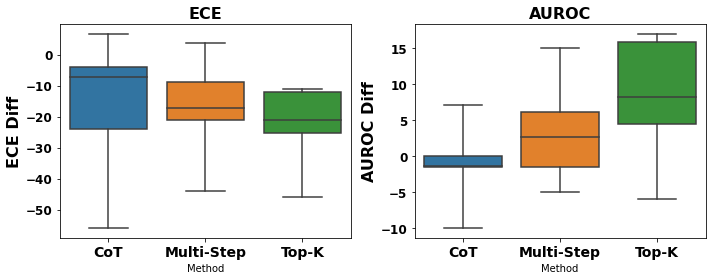

In [50]:
# 将Vanilla的值与其他方法的值进行差值运算
methods = ['CoT', 'Multi-Step', 'Top-K']
for method in methods:
    df.loc[df['Method'] == method, 'ECE_Diff'] = df.loc[df['Method'] == method, 'ECE'] - df.loc[df['Method'] == 'Vanilla', 'ECE'].values
    df.loc[df['Method'] == method, 'AUROC_Diff'] = df.loc[df['Method'] == method, 'AUROC'] - df.loc[df['Method'] == 'Vanilla', 'AUROC'].values

import seaborn as sns
# 创建画布
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
plt.figure(figsize=(10, 4))

plt.subplot(1,3,1)
sns.barplot(x='Method', y='ACC')

plt.subplot(1, 3, 2)
# 画ECE的box plot
sns.boxplot(x='Method', y='ECE_Diff', data=df[df['Method'] != 'Vanilla'], whis=(0, 100))
plt.title('ECE', fontsize=16,  fontweight='bold')
# plt.xticks([])
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.ylabel("ECE Diff", fontsize=16, fontweight='bold')

plt.subplot(1,3,3)

# 画AUROC的box plot
sns.boxplot(x='Method', y='AUROC_Diff', data=df[df['Method'] != 'Vanilla'], whis=(0, 100))
plt.title('AUROC', fontsize=16,  fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.ylabel("AUROC Diff", fontsize=16, fontweight='bold')

# 显示画布
plt.tight_layout()
plt.savefig("result_for_figure/verbalize-comparison.pdf", dpi=600)
plt.show()

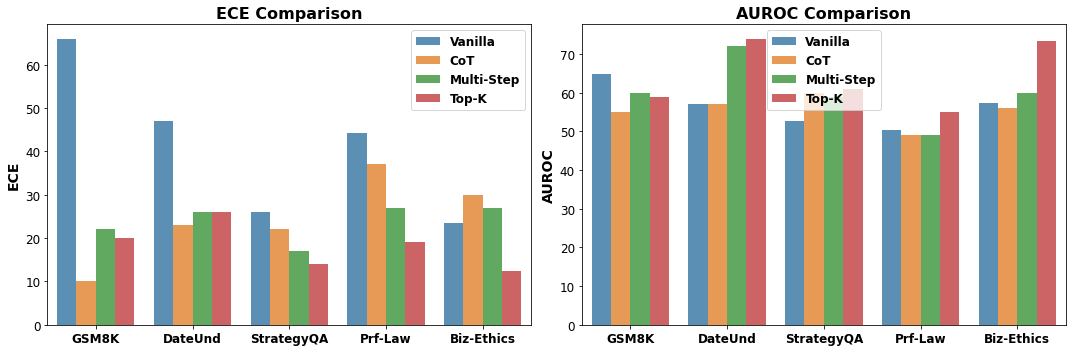

In [67]:
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

correct_color = plt.cm.tab10(0)
wrong_color = plt.cm.tab10(3)

sns.barplot(data=df, x='Dataset', y='ECE', hue='Method', ax=ax[0], alpha=0.8)
ax[0].set_title('ECE Comparison', fontsize=16, fontweight='bold')
ax[0].set_xlabel('', fontsize=14, fontweight='bold')
ax[0].set_ylabel('ECE', fontsize=14, fontweight='bold')
ax[0].legend(prop={'size': 12, 'weight': 'bold'})
ax[0].tick_params(axis='y', which='major', grid_alpha=0.5, labelsize=12)
for label in ax[0].get_xticklabels():
    label.set_fontsize(12)
    label.set_weight('bold')

sns.barplot(data=df, x='Dataset', y='AUROC', hue='Method', ax=ax[1], alpha=0.8)
ax[1].set_title('AUROC Comparison', fontsize=16, fontweight='bold')
ax[1].set_xlabel('', fontsize=14, fontweight='bold')
ax[1].set_ylabel('AUROC', fontsize=14, fontweight='bold')
ax[1].legend(prop={'size': 12, 'weight': 'bold'})
ax[1].tick_params(axis='y', which='major', grid_alpha=0.5, labelsize=12)
for label in ax[1].get_xticklabels():
    label.set_fontsize(12)
    label.set_weight('bold')

plt.tight_layout()
plt.savefig('result_for_figure/cot_vs_sa_vs_TopK_ECE_AUROC_verbalized.pdf', dpi=500, bbox_inches='tight')    
plt.show()